# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [61]:
from IPython.lib.display import YouTubeVideo

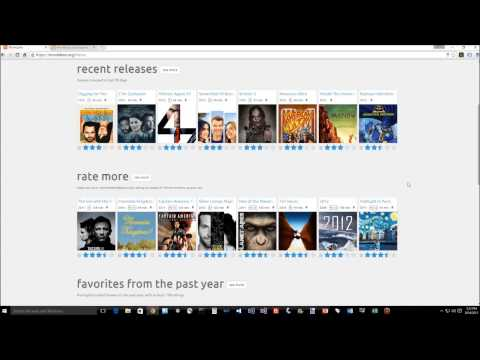

In [63]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

TEAM 14
=======

Micky Khandelwal (Mukund Khandelwal)

Brandon Werner

Andrew Lyu (Zhe Lyu)

Robin Lei (Zheling Lei)

M. Todd Hay

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


Download the 1 million ratings data set from GroupLens
===

In [4]:
# These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
# made by 6,040 MovieLens users who joined MovieLens in 2000.
import pandas as pd
# read users .dat file into dataframe 'users'
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')
# read rating .dat file into dataframe 'ratings'
rnames = ['user_id', 'movie_id','rating','timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')
# read movies .dat file into dataframe 'movies'
mnames = ['movie_id','title','genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [5]:
# verify dataframe users was loaded by viewing first 5 rows
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# verify dataframe ratings was loaded by viewing first 5 rows
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
# verify dataframe movies was loded by viewing first 5 rows
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


---

Merge all of the data into a single Pandas DataFrame
===

In [8]:
# merge 3 dataframes using panda's merge function. pandas infers which columns to use as merge keys (joins) based on overlapping names
merged_data = pd.merge( pd.merge(ratings, users), movies)

---

In [9]:
# verify merge by viewing first 5 head rows
merged_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
# use pandas indexer on merged data
# switched to .loc method... ".ix is deprecated. Please use .loc for label based indexing or .iloc for positional indexing"
merged_data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

---

Store the data into an HDF5 file
===

In [11]:
# store merged data as an HDF5 file
#  save as merged_data.hdf5 with 'df' as key/identifier for group in the store, 
#  mode of 'w' for Write; a new file is created (an existing file with the same name would be deleted).
#  format of 'table'; Write as a PyTables Table structure which may perform worse but allow more flexible operations like 
#  searching / selecting subsets of the data
#  data_columns is TRUE; List of columns to create as indexed data columns for on-disk queries, or True to use all columns. 
#    By default only the axes of the object are indexed. 
#    See here http://pandas.pydata.org/pandas-docs/stable/io.html#query-via-data-columns
#    Applicable only to format=’table’.

merged_data.to_hdf('merged_data.hdf5','movielens',mode='w',format='table',data_columns=True)

---

Start code for: How many movies have an average rating over 4.5 overall?
===


In [12]:
# Create pivot table for answering: How many movies have an average rating over 4.5 overall?
mean_ratings = pd.pivot_table(merged_data,index=['title'],values=['rating'],aggfunc='mean')
# verify new pivot table 'mean_ratings' (with average ratings by title) by viewing first 5 rows
mean_ratings.head()

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [13]:
# filter pivot table 'mean_ratings' where rating > 4.5 and store results in new dataframe
greater_than_45 = mean_ratings.query('rating > 4.5')
# display movie titles with rating greater than 4.5 in descending order of rating
greater_than_45.sort_values(by='rating', ascending=False)

,rating
title,
One Little Indian (1973),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
Bittersweet Motel (2000),5.000000
Ulysses (Ulisse) (1954),5.000000
Follow the Bitch (1998),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000
Song of Freedom (1936),5.000000
Lured (1947),5.000000
"Baby, The (1973)",5.000000


In [14]:
# Answer the question: How many movies have an average rating over 4.5 overall?
len(greater_than_45.index)

21

Q: How many movies have an average rating over 4.5 overall?
===
A: 21
===

---

Start code for: How many movies have an average rating over 4.5 among men?
===

In [15]:
# How many movies have an average rating over 4.5 among men? 
# create dataframe with gender = M
men_ratings = merged_data.loc[merged_data.gender == 'M']

In [16]:
# verify dataframe contains ratings only for gender = M by viewing first 5 rows
men_ratings.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama


In [17]:
# create pivot table with ratings by MEN for all movies
men_avg_ratings = pd.pivot_table(men_ratings,index=['title','gender'],values=['rating'],aggfunc='mean')

In [18]:
# verify pivot table contains avg rating by MEN for all movies
men_avg_ratings.head()

,,rating
title,gender,
"$1,000,000 Duck (1971)",M,2.761905
'Night Mother (1986),M,3.352941
'Til There Was You (1997),M,2.733333
"'burbs, The (1989)",M,2.962085
...And Justice for All (1979),M,3.689024


In [19]:
# create pivot table for movie titles with rating by MEN greater than 4.5
men_greater_than_45 = men_avg_ratings.query('rating > 4.5')
# list the movies with avg rating by MEN greater than 4.5
men_greater_than_45.sort_values(by='rating', ascending=False)

,,rating
title,gender,
Angela (1995),M,5.000000
"Gate of Heavenly Peace, The (1995)",M,5.000000
Ulysses (Ulisse) (1954),M,5.000000
Smashing Time (1967),M,5.000000
Small Wonders (1996),M,5.000000
Schlafes Bruder (Brother of Sleep) (1995),M,5.000000
Lured (1947),M,5.000000
Follow the Bitch (1998),M,5.000000
Dangerous Game (1993),M,5.000000


In [20]:
# Answer the question: How many movies have an average rating over 4.5 among men?
len(men_greater_than_45.index)

23

Q: How many movies have an average rating over 4.5 among men?
===
A: 23
===

---

Start code for: How many movies have an average rating over 4.5 among women?
===

In [21]:
# How many movies have an average rating over 4.5 among women?
# create dataframe where gender = F
women_ratings = merged_data.loc[merged_data.gender == 'F']

In [22]:
# verify dataframe contains ratings only for gender = F by viewing first 5 rows
women_ratings.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama


In [23]:
# create pivot table with ratings by WOMEN for all movies
women_avg_ratings = pd.pivot_table(women_ratings,index=['title','gender'],values=['rating'],aggfunc='mean')

In [24]:
# verify pivot table contains avg rating by WOMEN for all movies
women_avg_ratings.head()

,,rating
title,gender,
"$1,000,000 Duck (1971)",F,3.375000
'Night Mother (1986),F,3.388889
'Til There Was You (1997),F,2.675676
"'burbs, The (1989)",F,2.793478
...And Justice for All (1979),F,3.828571


In [25]:
# create pivot table for movie titles with rating by WOMEN greater than 4.5
women_greater_than_45 = women_avg_ratings.query('rating > 4.5')
# list the movies with avg rating by WOMEN greater than 4.5
women_greater_than_45.sort_values(by='rating', ascending=False)

,,rating
title,gender,
24 7: Twenty Four Seven (1997),F,5.000000
Dancemaker (1998),F,5.000000
Raw Deal (1948),F,5.000000
Prisoner of the Mountains (Kavkazsky Plennik) (1996),F,5.000000
Song of Freedom (1936),F,5.000000
"Other Side of Sunday, The (Søndagsengler) (1996)",F,5.000000
One Little Indian (1973),F,5.000000
Message to Love: The Isle of Wight Festival (1996),F,5.000000
Lamerica (1994),F,5.000000


In [26]:
# Answer the question: How many movies have an average rating over 4.5 among women?
len(women_greater_than_45.index)

51

Q: How many movies have an average rating over 4.5 among women?
===
A: 51
===

---

Start code for: How many movies have an median rating over 4.5 among men over age 30?
===

In [27]:
# How many movies have an median rating over 4.5 among men over age 30?
# create dataframe with gender = M and age > 30
men_over_30_ratings = merged_data.loc[merged_data.gender == 'M']
men_ovr_30_ratings = men_over_30_ratings.loc[men_over_30_ratings.age > 30]

In [28]:
# verify dataframe contains MEN over 30 ratings only by viewing first 5 rows
men_ovr_30_ratings.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama
12,44,1193,4,978018995,M,45,17,98052,One Flew Over the Cuckoo's Nest (1975),Drama
17,54,1193,5,977944039,M,50,1,56723,One Flew Over the Cuckoo's Nest (1975),Drama


In [29]:
# create pivot table with median ratings by MEN over 30 for all movies
men_ovr_30_median_ratings = pd.pivot_table(men_ovr_30_ratings,index=['title','gender'],values=['rating'],aggfunc='median')

In [30]:
# verify pivot table contains a median rating by MEN over 30 for all movies by viewing firt 5 rows
men_ovr_30_median_ratings.head()

,,rating
title,gender,
"$1,000,000 Duck (1971)",M,2.5
'Night Mother (1986),M,3.0
'Til There Was You (1997),M,2.0
"'burbs, The (1989)",M,3.0
...And Justice for All (1979),M,4.0


In [31]:
# display movie titles with median rating, by MEN over 30, greater than 4.5
men_ovr_30_median_grtr_than_45 = men_ovr_30_median_ratings.query('rating > 4.5')
# list the movies with median rating, by MEN over 30, greater than 4.5
men_ovr_30_median_grtr_than_45

,,rating
title,gender,
42 Up (1998),M,5.0
All Quiet on the Western Front (1930),M,5.0
American Beauty (1999),M,5.0
Among Giants (1998),M,5.0
Angela (1995),M,5.0
Ayn Rand: A Sense of Life (1997),M,5.0
"Bells, The (1926)",M,5.0
"Bicycle Thief, The (Ladri di biciclette) (1948)",M,5.0
"Boat, The (Das Boot) (1981)",M,5.0


In [32]:
# Answer the question: How many movies have an median rating over 4.5 among men over age 30?
len(men_ovr_30_median_grtr_than_45.index)

86

Q: How many movies have an median rating over 4.5 among men over age 30?
===
A: 86
===

---

Start code for: How many movies have an median rating over 4.5 among women over age 30?
===

In [33]:
# How many movies have an median rating over 4.5 among women over age 30?
# create dataframe with gender = F and age > 30
women_over_30_ratings = merged_data.loc[merged_data.gender == 'F']
women_ovr_30_ratings = women_over_30_ratings.loc[women_over_30_ratings.age > 30]

In [34]:
# verify dataframe contains WOMEN over 30 ratings only by viewing first 5 rows
women_ovr_30_ratings.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama
20,62,1193,4,977968584,F,35,3,98105,One Flew Over the Cuckoo's Nest (1975),Drama
23,88,1193,5,977694161,F,45,1,02476,One Flew Over the Cuckoo's Nest (1975),Drama
24,89,1193,5,977683596,F,56,9,85749,One Flew Over the Cuckoo's Nest (1975),Drama
37,146,1193,4,979940868,F,35,20,10954,One Flew Over the Cuckoo's Nest (1975),Drama


In [35]:
# create pivot table with median ratings by WOMEN over 30 for all movies
women_ovr_30_median_ratings = pd.pivot_table(women_ovr_30_ratings,index=['title','gender'],values=['rating'],aggfunc='median')

In [36]:
# verify pivot table contains a median rating by WOMEN over 30 for all movies by viewing first 5 rows
women_ovr_30_median_ratings.head()

,,rating
title,gender,
"$1,000,000 Duck (1971)",F,3.0
'Night Mother (1986),F,3.0
'Til There Was You (1997),F,3.0
"'burbs, The (1989)",F,3.0
...And Justice for All (1979),F,4.0


In [37]:
# display movie titles with median rating, by WOMEN over 30, greater than 4.5
women_ovr_30_median_grtr_than_45 = women_ovr_30_median_ratings.query('rating > 4.5')
# list the movies with median rating, by WOMEN over 30, greater than 4.5
women_ovr_30_median_grtr_than_45

,,rating
title,gender,
24 7: Twenty Four Seven (1997),F,5.0
"400 Blows, The (Les Quatre cents coups) (1959)",F,5.0
Across the Sea of Time (1995),F,5.0
"African Queen, The (1951)",F,5.0
After Life (1998),F,5.0
Amadeus (1984),F,5.0
Among Giants (1998),F,5.0
Aparajito (1956),F,5.0
"Apple, The (Sib) (1998)",F,5.0


In [38]:
# Answer the question: How many movies have an median rating over 4.5 among women over age 30?
len(women_ovr_30_median_grtr_than_45.index)

149

Q: How many movies have an median rating over 4.5 among women over age 30?
===
A: 149
===

---

Start code for: What are the ten most popular movies?
===

In [1]:
# What are the ten most popular movies?
#  Choose what you consider to be a reasonable defintion of "popular".  Be prepared to defend this choice.
#
# We would argue that "popular" movies are those which have the greatest number of people sharing their opinion 
# about the movie.    
#
# If a person shares their opinion about a movie we can assume that means the person saw the movie.  We consider
# each review to represent a viewing, and each viewing of a movie is a "vote" in favor of the movie being "popular".

In [40]:
# create pivot table popular_movies which contains the average ratingby title
popular_movies = pd.pivot_table(merged_data,index=['title','genres'],values=['rating'],aggfunc={'mean'})
# add a column called 'reviews' which represents the number of reviews for the movie
popular_movies['reviews'] = pd.pivot_table(merged_data,index=['title','genres'],values=['rating'],aggfunc={len})

In [41]:
# Slice the first 10 movies from the descending order, popular_movies pivot table... 
# I argue that THESE are the TOP 10 MOST POPULAR MOVIES because they have the MOST reviews.
#-------------------------------------------------------------------------------------------
popular_movies.sort_values(by='reviews', ascending=False)[:10]

,,rating,reviews
,,mean,
title,genres,,
American Beauty (1999),Comedy|Drama,4.317386,3428
Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Drama|Sci-Fi|War,4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,4.022893,2883
Jurassic Park (1993),Action|Adventure|Sci-Fi,3.763847,2672
Saving Private Ryan (1998),Action|Drama|War,4.337354,2653
Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,4.058513,2649
"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.315830,2590


Q: What are the ten most popular movies?
===
A: 
===
American Beauty (1999)
===
Star Wars: Episode IV - A New Hope (1977)
===
Star Wars: Episode V - The Empire Strikes Back (1980)
===
Star Wars: Episode VI - Return of the Jedi (1983)
===
Jurassic Park (1993)
===
Saving Private Ryan (1998)
===
Terminator 2: Judgment Day (1991)
===
Matrix, The (1999)
===
Back to the Future (1985)
===
Silence of the Lambs, The (1991)
===

---

The above results are supported by the following data from Box Office Mojo (http://www.boxofficemojo.com) which shows domestic, wide-opening weekend gross dollars earned for each title.
===

9 out of 10 titles on our "Ten Most Popular Movies" were the top grossing movies for their opening weekend.
===

 American Beauty:                                       No.3 rank, 706 theaters, $11,598 average

 Star Wars: Episode IV - A New Hope:                    No.1 rank, 757 theaters, $8,992 average

 Star Wars: Episode V - The Empire Strikes Back (1980): No.1 rank, 823 theaters, $13,171 average

 Star Wars: Episode VI - Return of the Jedi (1983):     No. 1 rank, 1,002 theaters, $22,973

 Jurassic Park (1993):                                  No. 1 rank, 2,404 theaters, $19,561 average

 Saving Private Ryan (1998):                            No. 1 rank, 2,463 theaters, $12,414 average

 Terminator 2: Judgment Day (1991):                     (Non-3D) No. 1 rank, 2,463 theaters, $12,414 average
 
                              (3D) No. 25 rank, 371 theaters, $1,490 average

 Matrix, The (1999:                                     No. 1 rank, 2,849 theaters, $9,753 average

 Back to the Future (1985):                             No. 1 rank, 1,420 theaters, $7,853 average

 Silence of the Lambs, The (1991):                      No. 1 rank, 1,497 theaters, $9,196 average


---

Conjecture 1: Movie reviewers who are retired have the highest average rating.
===

In [2]:
# Conjecture: Movie reviewers who are retired are most generous with their ratings. 
#----------------------------------------------------------------------------------
# My theory is that this population generally has:
# 1) a happier disposition
# 2) more time for entertainment 
# 3) they tend to be older and are more easily impressed with the technical advances showcased in todays films 

In [43]:
# first we bring in more descriptive data for age and occupation
# read age.xls file into dataframe 'age'
age = pd.read_excel('age.xls',sheetname='age', header=0)
# verify the dataframe was loaded by viewing all rows
age

,age,age_desc
0,1,Under 18
1,18,18-24
2,25,25-34
3,35,35-44
4,45,45-49
5,50,50-55
6,56,56+


In [44]:
# read occuption.xls file into dataframe 'occupation' 
# I added a Science-Technology_Engineering-Education-Math indicator (STEEM) for additional conjecture(s)
occupation = pd.read_excel('occupation.xls',sheetname='occupation', header=0)
# verify the dataframe was loaded by viewing all row
occupation

,occupation,occupation_desc,steem_ind
0,0,other or not specified,N
1,1,academic/educator,Y
2,2,artist,N
3,3,clerical/admin,N
4,4,college/grad student,N
5,5,customer service,N
6,6,doctor/health care,Y
7,7,executive/managerial,N
8,8,farmer,N
9,9,homemaker,N


In [45]:
# merge age and occupation data with prior merged datafrme
conjecture_merged_data = pd.merge( pd.merge(merged_data, age), occupation)
# verify dataframe was loaded by viewing the first 5 head rows
conjecture_merged_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_desc,occupation_desc,steem_ind
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,N
1,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,N
2,99,1193,2,982791053,F,1,10,19390,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,N
3,349,1193,4,1007923963,M,1,10,08035,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,N
4,960,1193,4,975122486,M,1,10,45244,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,K-12 student,N


In [46]:
# use pandas indexer on merged data
#----------------------------------
conjecture_merged_data.loc[0]

user_id                                                 1
movie_id                                             1193
rating                                                  5
timestamp                                       978300760
gender                                                  F
age                                                     1
occupation                                             10
zip                                                 48067
title              One Flew Over the Cuckoo's Nest (1975)
genres                                              Drama
age_desc                                         Under 18
occupation_desc                              K-12 student
steem_ind                                               N
Name: 0, dtype: object

In [47]:
# create pivot table with mean rating by occupation
ratings_by_occupation = pd.pivot_table(conjecture_merged_data,index=['occupation_desc'],values=['rating'],aggfunc='mean')
# add column to show number of reviews for an occupation
ratings_by_occupation['reviews'] = pd.pivot_table(conjecture_merged_data,index=['occupation_desc'],values=['rating'],aggfunc={len})
# view the details: show average ratings by occupation, sorted in descending order of average rating
ratings_by_occupation.sort_values(by='rating', ascending=False)

,rating,reviews
occupation_desc,,
retired,3.781736,13754
scientist,3.689774,22951
doctor/health care,3.661578,37205
homemaker,3.656589,11345
clerical/admin,3.656516,31623
programmer,3.654001,57214
sales/marketing,3.618481,49109
lawyer,3.617371,20563
technician/engineer,3.613574,72816


Conjecture 1: Proven true by the above data. For the occupation 'Retired' the average rating is ranked 1st with 3.781736
===

---

Conjecture 2: Reviewers in science, technology, engineering, education & math occupations have average ratings lower than every other occupation.
===

In [1]:
# Conjecture: Movie reviewers with occupations in the science, technology, engineering, education & math (STEEM) domains
# have average ratings lowers than all other non-STEEM occupations. 
#----------------------------------------------------------------------------------
# Our theory is that people in STEEM occupations generally :
# 1) follow stricter models for awarding "merit".
# 2) are analytical by nature and make data-driven awards of merit whereas rating a movie is more of an emotional response.
# 3) hold back on higher ratings because they believe there is only a small set of deservedly 5-star movies.

In [49]:
# create pivot table with mean rating and steem_ind 
ratings_by_occupation = pd.pivot_table(conjecture_merged_data,index=['occupation_desc'],columns=['steem_ind'],values=['rating'],fill_value='',aggfunc='mean')
# view the details: show average ratings by occupation description, split out by steem indicator
ratings_by_occupation

rating         
steem_ind                     N        Y
occupation_desc                         
K-12 student            3.53267         
academic/educator                3.57664
artist                  3.57308         
clerical/admin          3.65652         
college/grad student    3.53679         
customer service        3.53753         
doctor/health care               3.66158
executive/managerial    3.59977         
farmer                  3.46674         
homemaker               3.65659         
lawyer                  3.61737         
other or not specified  3.53754         
programmer                         3.654
retired                 3.78174         
sales/marketing         3.61848         
scientist                        3.68977
self-employed           3.59658         
technician/engineer              3.61357
tradesman/craftsman     3.53012         
unemployed              3.41405         
writer                  3.49739

In [50]:
# create pivot table with mean rating by steem_ind 
ratings_by_occupation = pd.pivot_table(conjecture_merged_data,index=['steem_ind'],values=['rating'],fill_value='',aggfunc='mean')
# show the average rating by occupational steem indicator
ratings_by_occupation

,rating
steem_ind,
N,3.565674
Y,3.623357


Conjecture 2: Proven false by the above data. For all the STEEM-related occupations the average rating is slightly higher (by 0.058) than all the Non-STEEM occupations.
===

---

Conjecture 3: Movies associated with the 'Action' genre are more universally liked (smallest standard deviation) than any other movie genre.
===
	Possible genres are:
    Action
	Adventure
	Animation
	Children's
	Comedy
	Crime
	Documentary
	Drama
	Fantasy
	Film-Noir
	Horror
	Musical
	Mystery
	Romance
	Sci-Fi
	Thriller
	War
	Western

In [66]:
# Chapter 7: Data Transfomation, Computing Indicator/ Dummy Variables
# Source: McKinney, Wes. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython
# ----------------------------------------------------------------------------------------
#extract list of unique genres in the dataset
genre_iter = (set( x.split('|')) for x in movies.genres)
# sort it
genres = sorted( set.union(* genre_iter))
# view the dataframe to verify results
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [67]:
# Construct the indicator DataFrame by starting with a DataFrame of all zeros
dummies = pd.DataFrame( np.zeros(( len( movies), len( genres))), columns = genres)

In [68]:
# Iterate through each movie and set entries in each row of dummies to 1
for i, gen in enumerate( movies.genres): 
            dummies.loc[ i, gen.split('|')] = 1

In [71]:
# Combine this with movies
movies_windic = movies.join(dummies.add_prefix('Genre_'))
# view to verify results
movies_windic.head()

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# create new merged datafame with genre indicators using movies_windic
merged_data_genre_ind = pd.merge( pd.merge(ratings, users), movies_windic)
# verify merge by viewing rows
merged_data_genre_ind.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# isolate movies with an genre_action = 1 indicator
action_genre = merged_data_genre_ind.loc[merged_data_genre_ind['Genre_Action'] == 1]
# view dataframe of all movies with action genre = 1
action_genre.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
5904,1,1197,3,978302268,F,1,10,48067,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5905,3,1197,5,978297570,M,25,15,55117,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5906,10,1197,5,979167660,F,35,1,95370,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5907,11,1197,5,978903297,F,25,1,04093,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5908,13,1197,4,978201320,M,45,1,93304,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
# create pivot table with standard devation of rating for all movies with the action genre indicator 
ratings_stdev_for_action = pd.pivot_table(action_genre,index=['Genre_Action'],values=['rating'],aggfunc=[np.std, len])
# sort the standard deviation of rating by genre in ascending order
ratings_stdev_for_action.sort_values(('std', 'rating'), ascending=True)

,std,len
,rating,rating
Genre_Action,,
1.0,1.133471,257457


In [82]:
# isolate movies with an genre_action = 0 indicator (all movies without the Action genre)
non_action_genre = merged_data_genre_ind.loc[merged_data_genre_ind['Genre_Action'] == 0]
# view dataframe of all movies with action genre = 1
non_action_genre.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# create pivot table with standard devation of rating for all movies without the action genre indicator 
ratings_stdev_for_non_action = pd.pivot_table(non_action_genre,index=['Genre_Action'], values=['rating'],aggfunc=[np.std, len])
# sort the standard deviation of rating by genre in ascending order
ratings_stdev_for_non_action.sort_values(('std', 'rating'), ascending=True)

,std,len
,rating,rating
Genre_Action,,
0.0,1.109656,742752


Conjecture 3: Is proven false by the above data.  
===
However, it is worth noting that even though the standard deviation for movies with the Action genre is slightly higher (0.023815) than all Non-Action genre movies, the sample size for Action genre movies is approximately 1/3 of the sample size of all Non-Action movies.  
===
A larger sample size for movies with the Action genre could have an effect on the calculation for standard deviation.  
===
* The standard deviation for movies with an 'Action' genre indicator is: 1.133471	(based on sample size of 257,457)

* The standard deviation for movies without an 'Action' genre indicator is: 1.109656 (based on sample size of 742,752)


 ---

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [51]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [52]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **